In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler


In [2]:
cols = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 'fM3Long', 'fM3Trans', 'fAlpha', 'fDist', 'class']

df = pd.read_csv('magic_gamma_telescope/magic04.data', names=cols)
# df.head(5)

result = df[df['class'] == 'h']
print(result)

        fLength   fWidth   fSize   fConc  fConc1     fAsym   fM3Long  \
12332   93.7035  37.9432  3.1454  0.1680  0.1011   53.2566   89.0566   
12333  102.0005  22.0017  3.3161  0.1064  0.0724  -54.0862   43.0553   
12334  100.2775  21.8784  3.1100  0.3120  0.1446  -48.1834   57.6547   
12335   91.6558  18.8293  2.7097  0.4386  0.3420  -52.6841  -97.8373   
12336   38.0195  12.6736  2.8747  0.4084  0.1928  -51.4840    8.3471   
...         ...      ...     ...     ...     ...       ...       ...   
19015   21.3846  10.9170  2.6161  0.5857  0.3934   15.2618   11.5245   
19016   28.9452   6.7020  2.2672  0.5351  0.2784   37.0816   13.1853   
19017   75.4455  47.5305  3.4483  0.1417  0.0549   -9.3561   41.0562   
19018  120.5135  76.9018  3.9939  0.0944  0.0683    5.8043  -93.5224   
19019  187.1814  53.0014  3.2093  0.2876  0.1539 -167.3125 -168.4558   

       fM3Trans   fAlpha     fDist class  
12332   11.8175  14.1224  231.9028     h  
12333  -15.0647  88.4636  274.9392     h  
12334 

In [3]:
# convert g and h to ints(gammas or hadrons)
df['class'] = (df['class'] == 'g').astype(int)
# df['class'] = (df['class'] == 'h').astype(int)


# df.head(5)

df_last_5 = df.iloc[5:10]
print(df_last_5)

   fLength   fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
5  51.6240  21.1502  2.9085  0.2420  0.1340   50.8761  43.1887    9.8145   
6  48.2468  17.3565  3.0332  0.2529  0.1515    8.5730  38.0957   10.5868   
7  26.7897  13.7595  2.5521  0.4236  0.2174   29.6339  20.4560   -2.9292   
8  96.2327  46.5165  4.1540  0.0779  0.0390  110.3550  85.0486   43.1844   
9  46.7619  15.1993  2.5786  0.3377  0.1913   24.7548  43.8771   -6.6812   

   fAlpha    fDist  class  
5   3.613  238.098      1  
6   4.792  219.087      1  
7   0.812  237.134      1  
8   4.854  248.226      1  
9   7.875  102.251      1  


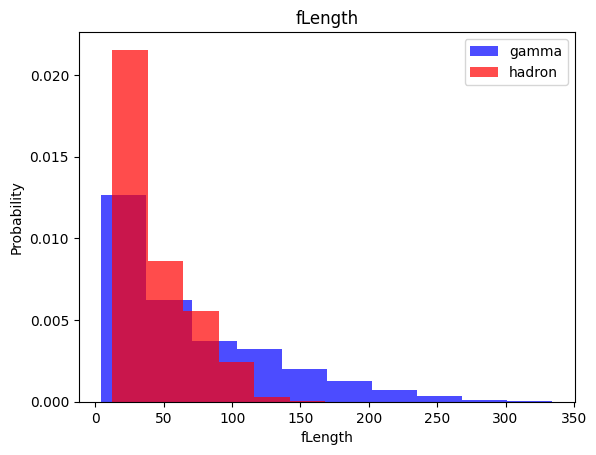

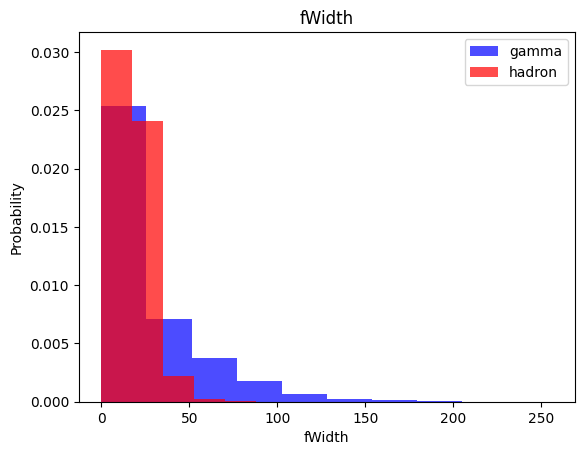

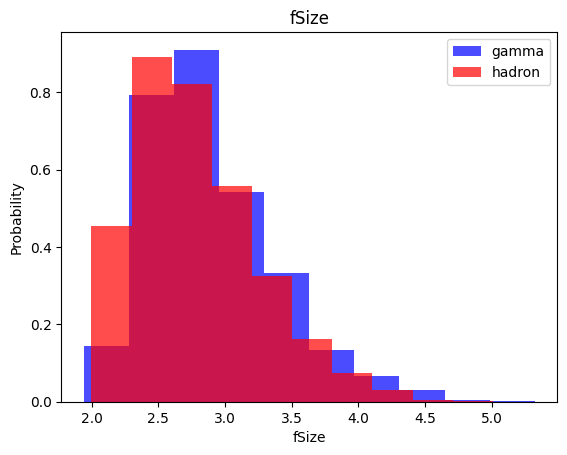

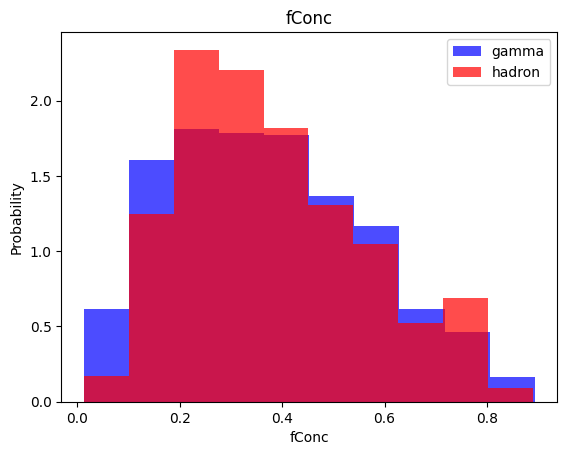

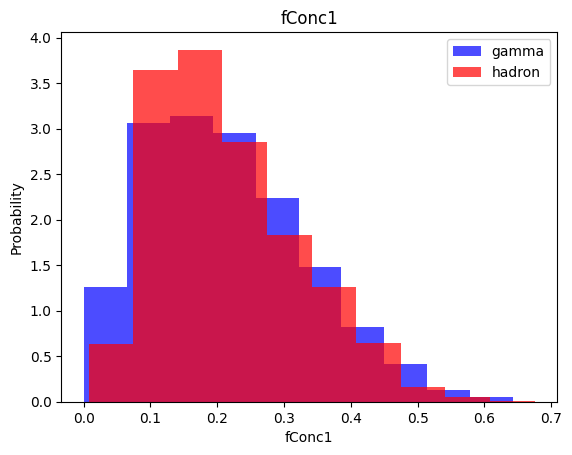

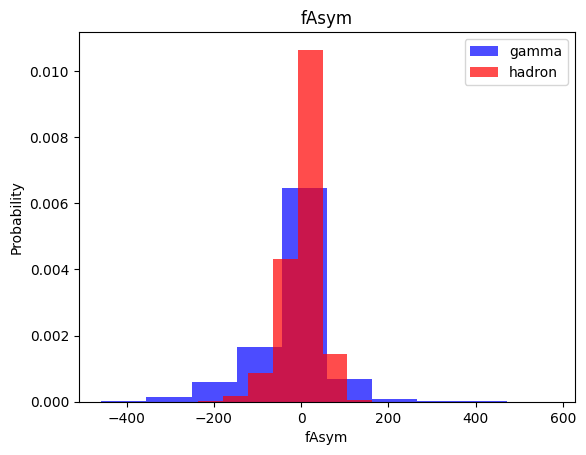

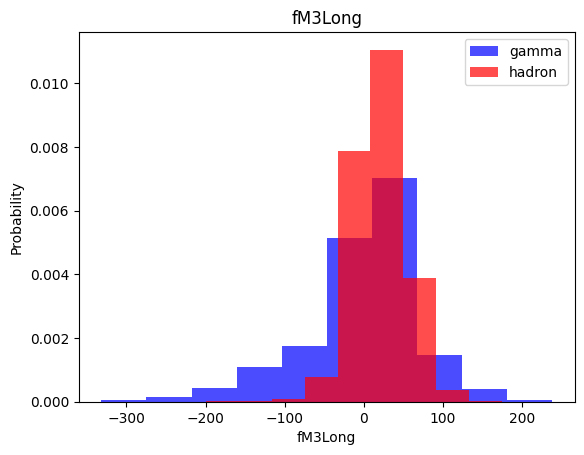

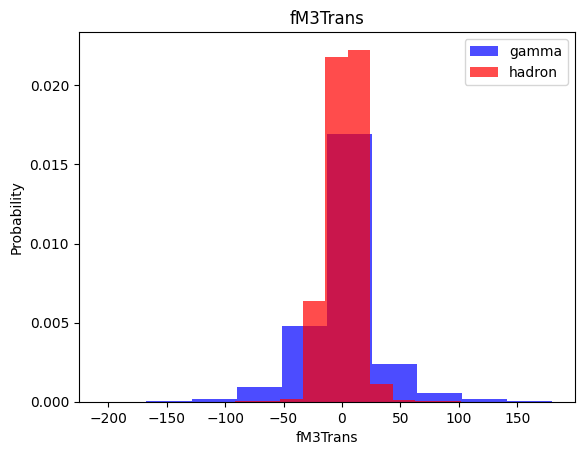

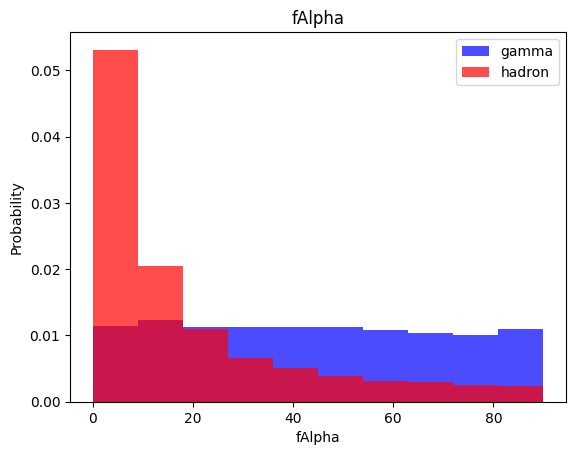

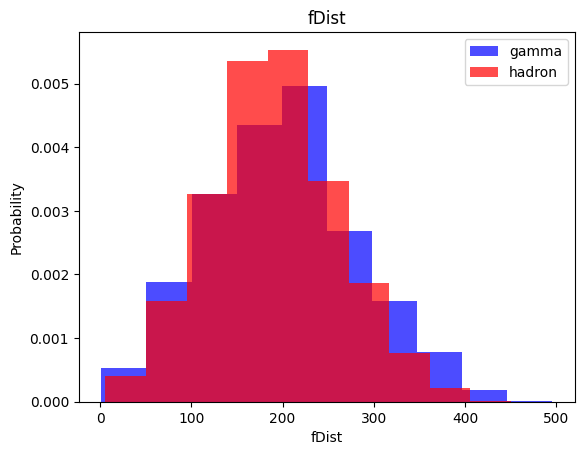

In [4]:
for label in cols[:-1]:
    plt.hist(df[df['class'] == 0][label], color='blue', label='gamma', alpha=0.7, density=True)
    plt.hist(df[df['class'] == 1][label], color='red', label='hadron', alpha=0.7, density=True)
    plt.title(label)
    plt.ylabel('Probability')
    plt.xlabel(label)
    plt.legend()
    plt.show()

## Train, validation and test

In [5]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

c:\Users\wanjohi\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [6]:
def scale_dataset(dataframe, oversample=False):
    X= dataframe[dataframe.columns[:-1]].values
    y= dataframe[dataframe.columns[-1]].values

    scalar = StandardScaler()
    X = scalar.fit_transform(X)

    if oversample:
        ros = RandomOverSampler()
        X,y = ros.fit_resample(X,y)

    data = np.hstack((X, np.reshape(y, (-1, 1))))
    return data, X, y

In [7]:

# print lenght of train hadron data
print(len(train[train['class'] == 0]))

# print lenght of train gamma data
print(len(train[train['class'] == 1]))

3926
7486


In [8]:
train, X_train, y_train = scale_dataset(train, oversample=True)
valid, X_valid, y_valid = scale_dataset(valid, oversample=False)
test, X_test, y_test = scale_dataset(test, oversample=False)

In [9]:
# check if oversampling worked
if len(X_train) != len(y_train):
    print("Sampling Didn't work")
else:
    print("Sampling Worked")

Sampling Worked


## K Nearest Neighbors Model

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [11]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [12]:
y_pred = knn_model.predict(X_test)

y_pred

array([1, 0, 1, ..., 1, 0, 1])

In [13]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.72      0.74      1399
           1       0.84      0.87      0.85      2405

    accuracy                           0.81      3804
   macro avg       0.80      0.79      0.79      3804
weighted avg       0.81      0.81      0.81      3804



## NaiveBase

In [14]:
from sklearn.naive_bayes import GaussianNB

In [15]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

GaussianNB()

In [16]:
y_pred = nb_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.38      0.50      1399
           1       0.72      0.91      0.80      2405

    accuracy                           0.72      3804
   macro avg       0.72      0.65      0.65      3804
weighted avg       0.72      0.72      0.69      3804



## Logistic Regression

In [17]:
from sklearn.linear_model import LogisticRegression

In [18]:
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

LogisticRegression()

In [19]:
y_pred = log_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.71      0.70      1399
           1       0.83      0.81      0.82      2405

    accuracy                           0.77      3804
   macro avg       0.76      0.76      0.76      3804
weighted avg       0.77      0.77      0.77      3804



## Support Vector Machines

In [20]:
# import support vector machine
from sklearn.svm import SVC

In [21]:
svm_model = SVC()
svm_model.fit(X_train, y_train)

SVC()

In [22]:
y_pred = svm_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.79      0.81      1399
           1       0.88      0.91      0.89      2405

    accuracy                           0.86      3804
   macro avg       0.85      0.85      0.85      3804
weighted avg       0.86      0.86      0.86      3804



## Neural Network using TensorFlow

In [23]:
import tensorflow as tf

In [77]:
# loss and accuracy function
def plot_history(history):
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,4))
    ax1.plot(history.history['loss'], label = 'loss')
    ax1.plot(history.history['val_loss'], label = 'val_loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Binary crossentropy')
    ax1.grid(True)


    ax2.plot(history.history['accuracy'], label = 'accuracy')
    ax2.plot(history.history['val_accuracy'], label = 'val_accuracy')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    ax1.grid(True)

    plt.show()

In [37]:
def train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
    nn_model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(num_nodes, activation='relu', input_shape=(10,)),
    tf.keras.layers.Dropout(dropout_prob),
    tf.keras.layers.Dense(num_nodes, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr), 
                 loss='binary_crossentropy', 
                 metrics=['accuracy'])
    
    history = nn_model.fit(X_train, 
                           y_train, 
                           epochs=epochs, 
                           batch_size=batch_size, 
                           validation_split=0.2, 
                           verbose=0)

    return nn_model, history

In [38]:
plot_history(history)

NameError: name 'history' is not defined

16 nodes, dropout 0.2, lr 0.001, batch_size 32


c:\Users\wanjohi\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


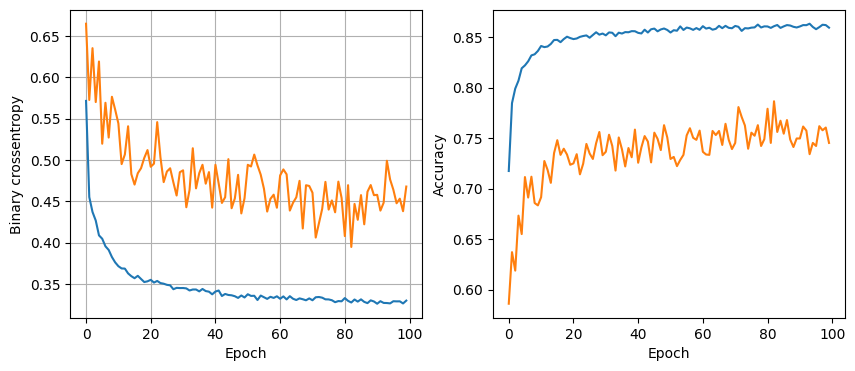

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8623 - loss: 0.3185
16 nodes, dropout 0.2, lr 0.001, batch_size 64


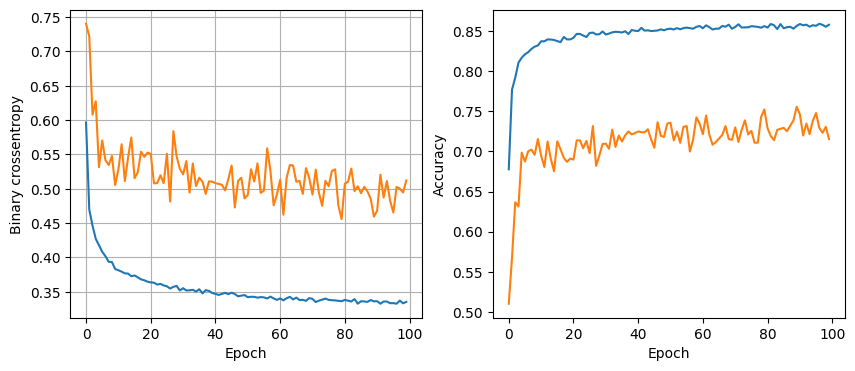

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8606 - loss: 0.3261
16 nodes, dropout 0.2, lr 0.001, batch_size 128


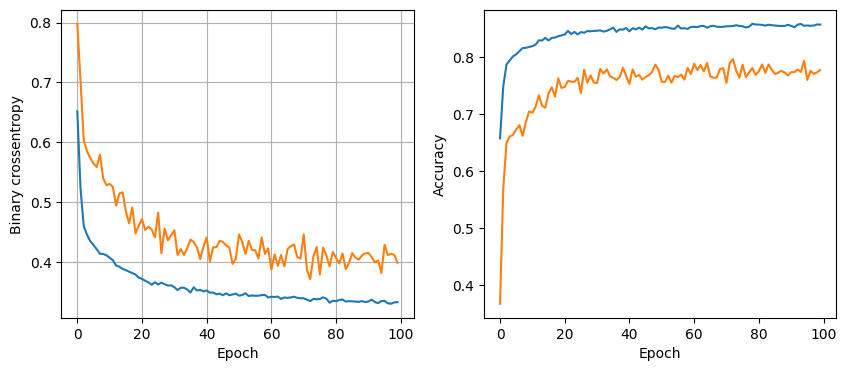

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8669 - loss: 0.3254
16 nodes, dropout 0.2, lr 0.01, batch_size 32


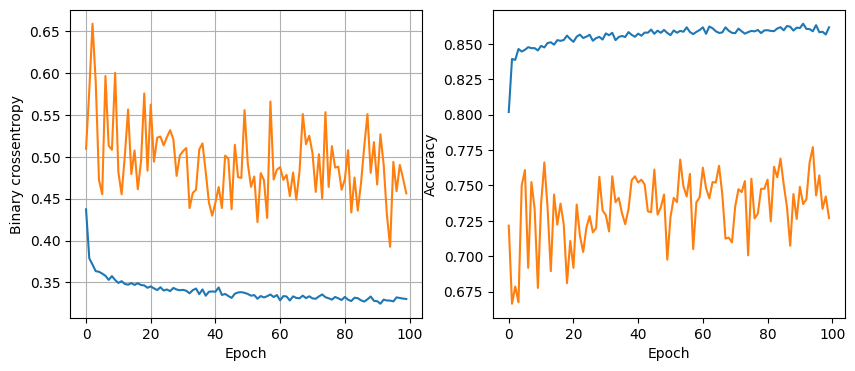

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8629 - loss: 0.3260
16 nodes, dropout 0.2, lr 0.01, batch_size 64


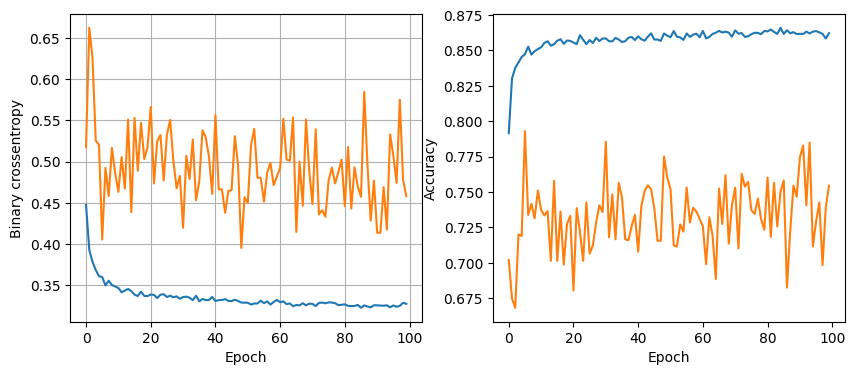

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8746 - loss: 0.3097
16 nodes, dropout 0.2, lr 0.01, batch_size 128


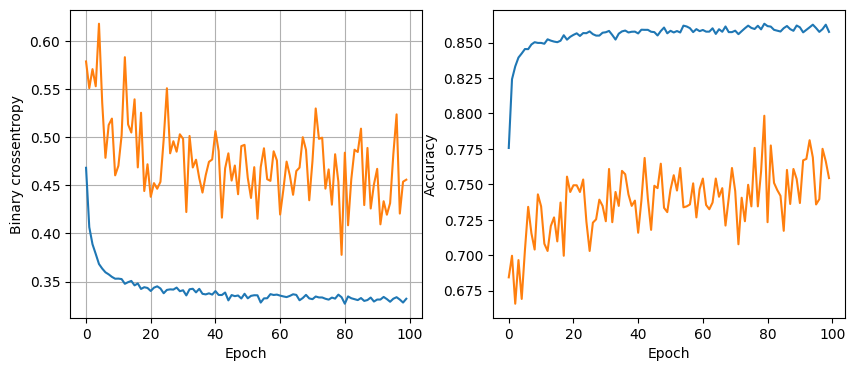

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8661 - loss: 0.3216
16 nodes, dropout 0.2, lr 0.1, batch_size 32


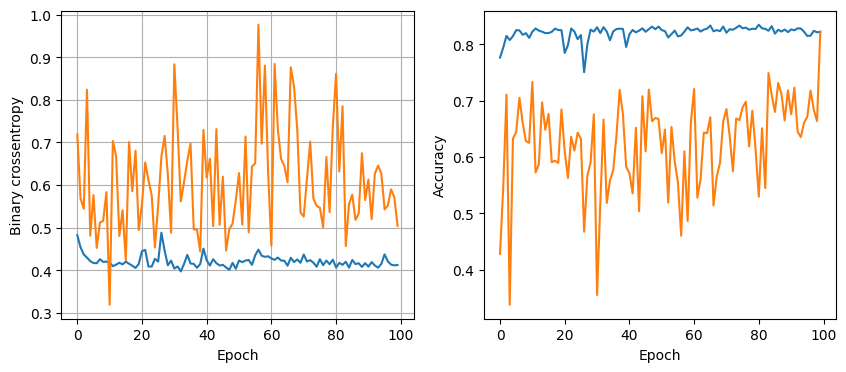

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8207 - loss: 0.4017
16 nodes, dropout 0.2, lr 0.1, batch_size 64


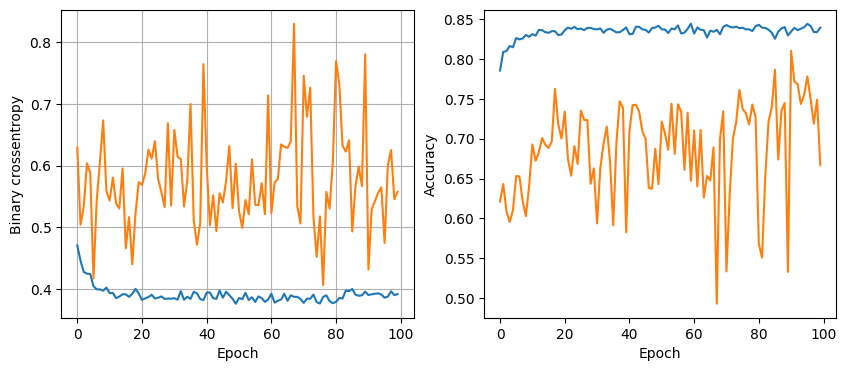

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8506 - loss: 0.3815
16 nodes, dropout 0.2, lr 0.1, batch_size 128


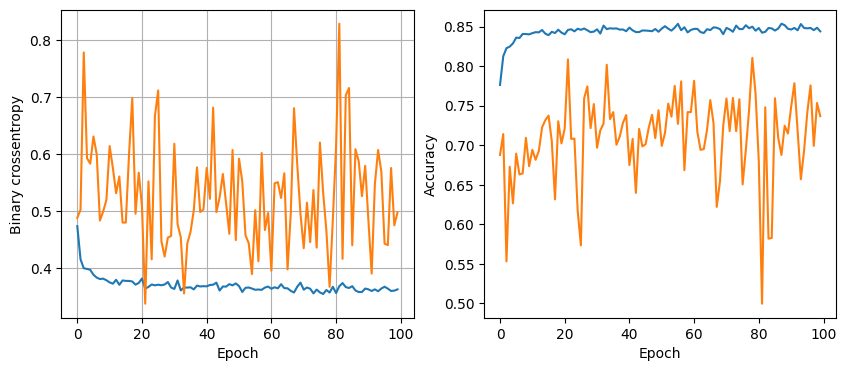

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8534 - loss: 0.3368
16 nodes, dropout 0.5, lr 0.001, batch_size 32


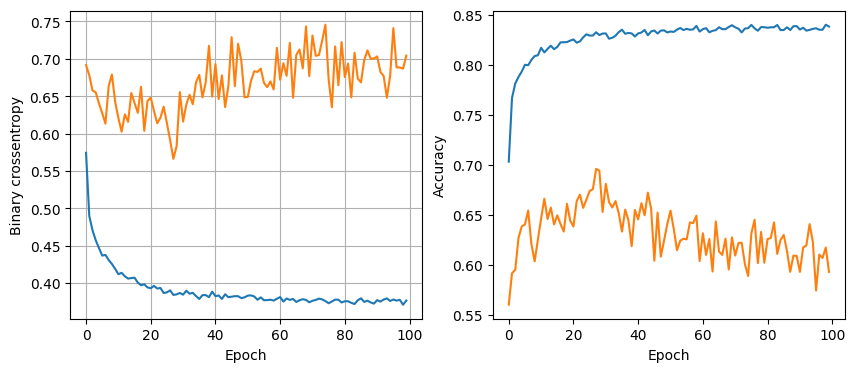

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8459 - loss: 0.3945
16 nodes, dropout 0.5, lr 0.001, batch_size 64


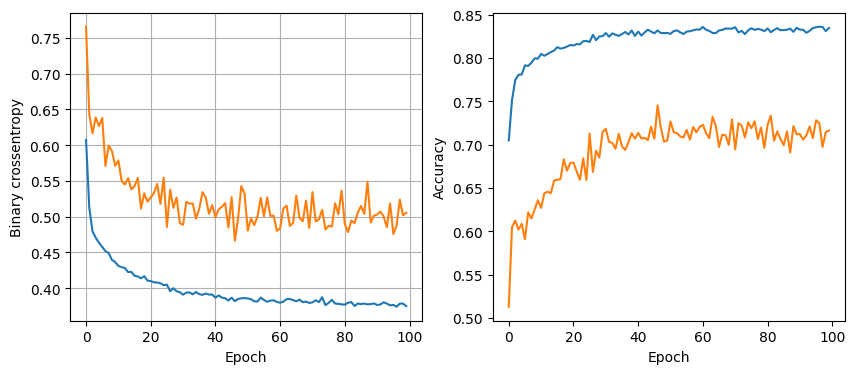

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8619 - loss: 0.3815
16 nodes, dropout 0.5, lr 0.001, batch_size 128


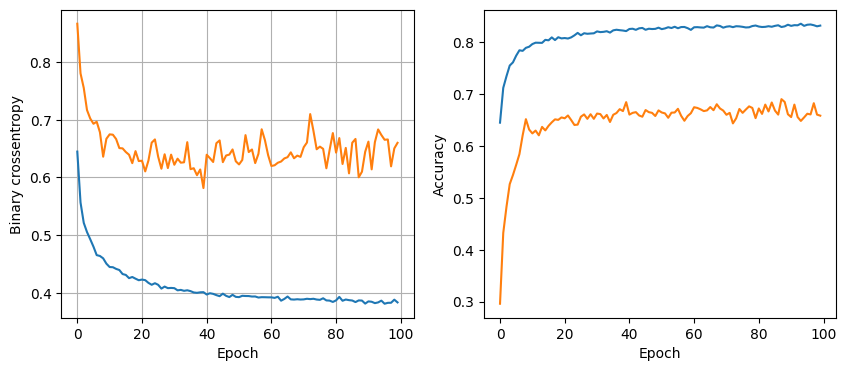

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8514 - loss: 0.3714
16 nodes, dropout 0.5, lr 0.01, batch_size 32


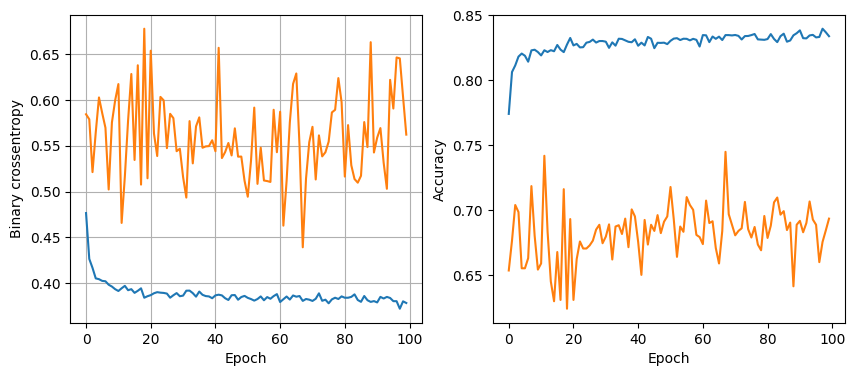

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8530 - loss: 0.3571
16 nodes, dropout 0.5, lr 0.01, batch_size 64


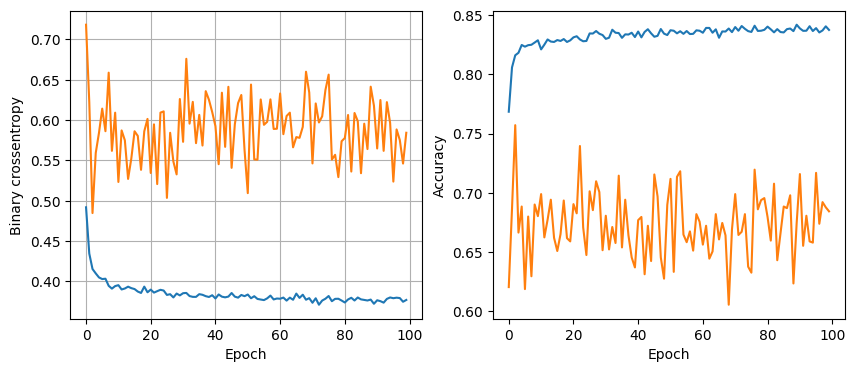

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8557 - loss: 0.3726
16 nodes, dropout 0.5, lr 0.01, batch_size 128


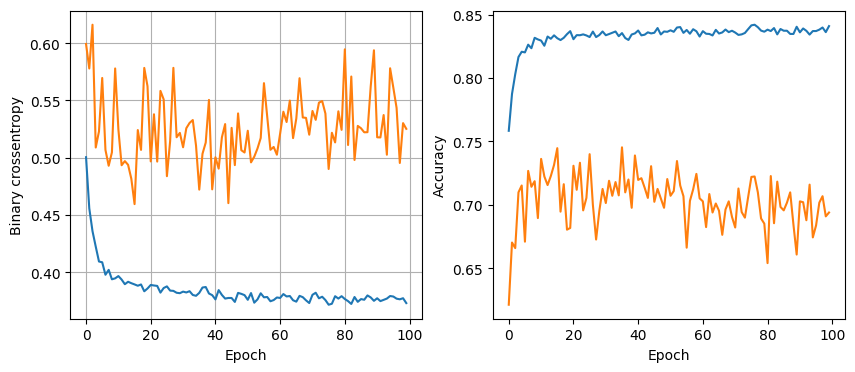

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8551 - loss: 0.3700
16 nodes, dropout 0.5, lr 0.1, batch_size 32


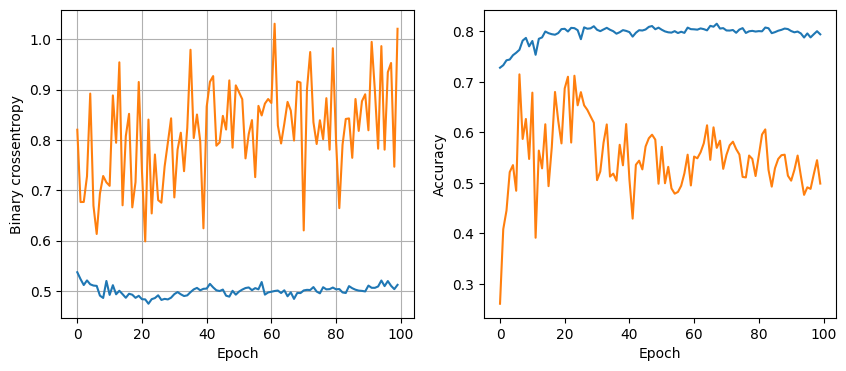

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7996 - loss: 0.5186
16 nodes, dropout 0.5, lr 0.1, batch_size 64


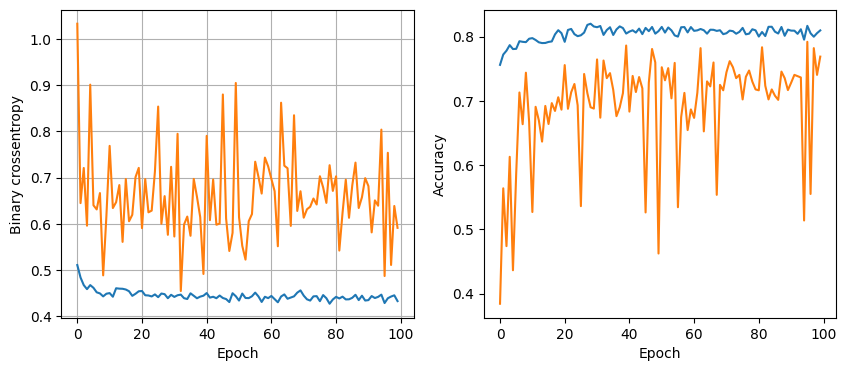

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8398 - loss: 0.4051
16 nodes, dropout 0.5, lr 0.1, batch_size 128


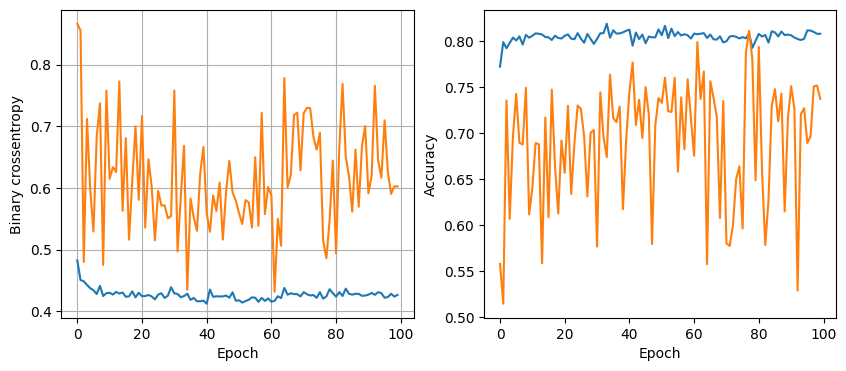

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8512 - loss: 0.3770
32 nodes, dropout 0.2, lr 0.001, batch_size 32


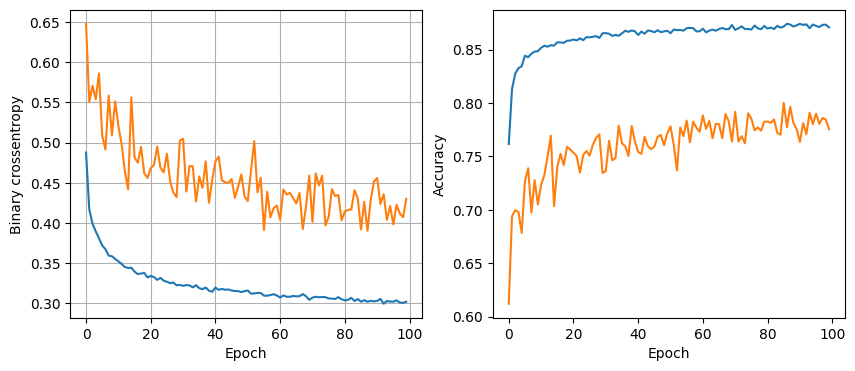

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8678 - loss: 0.3108
32 nodes, dropout 0.2, lr 0.001, batch_size 64


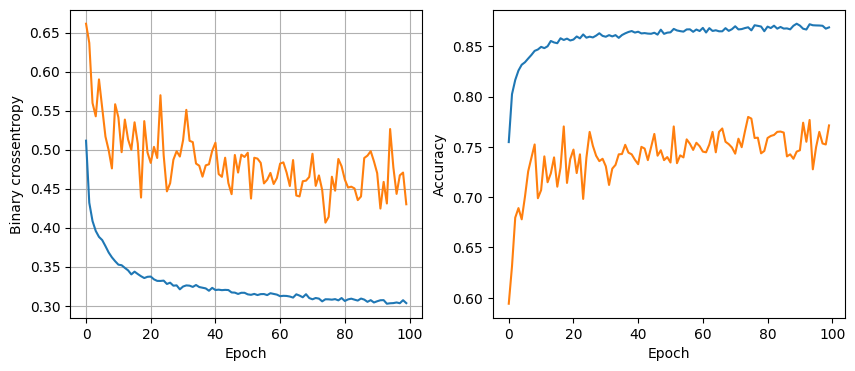

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8715 - loss: 0.3086
32 nodes, dropout 0.2, lr 0.001, batch_size 128


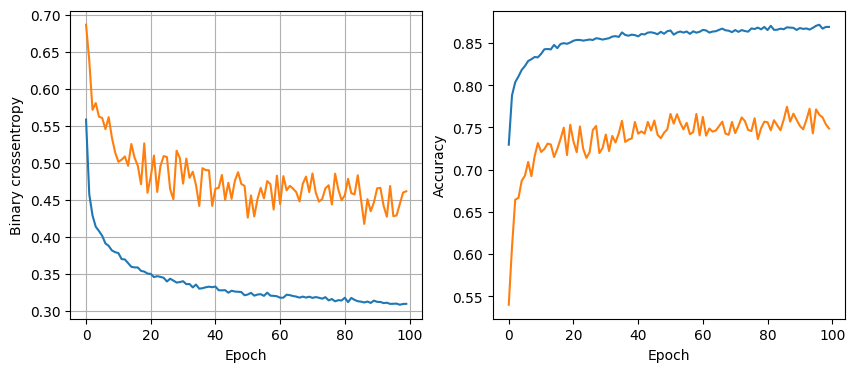

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8656 - loss: 0.3109
32 nodes, dropout 0.2, lr 0.01, batch_size 32


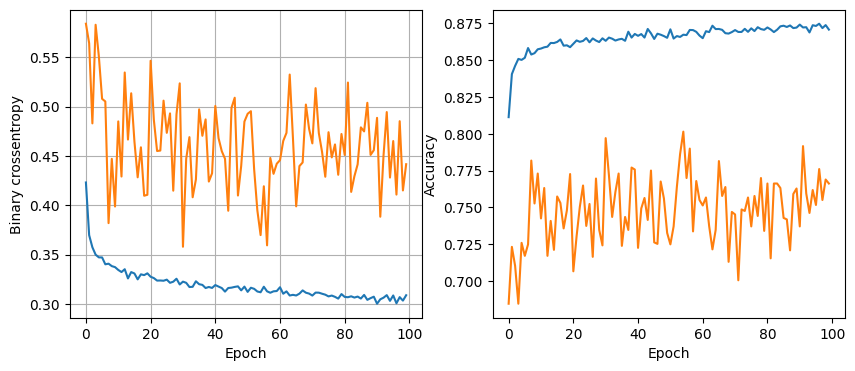

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8656 - loss: 0.3104
32 nodes, dropout 0.2, lr 0.01, batch_size 64


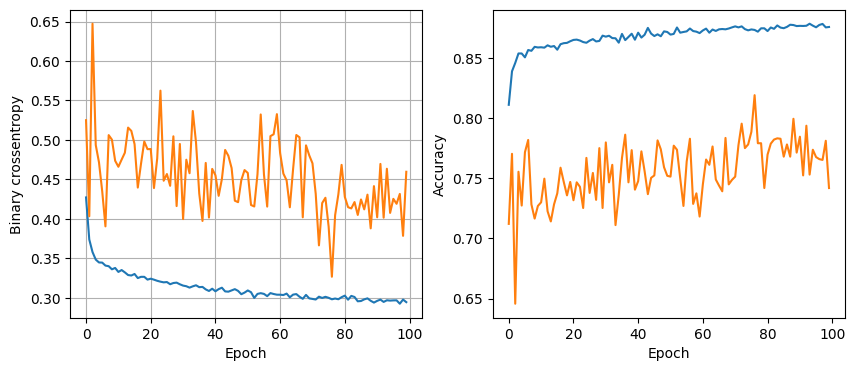

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8663 - loss: 0.3117
32 nodes, dropout 0.2, lr 0.01, batch_size 128


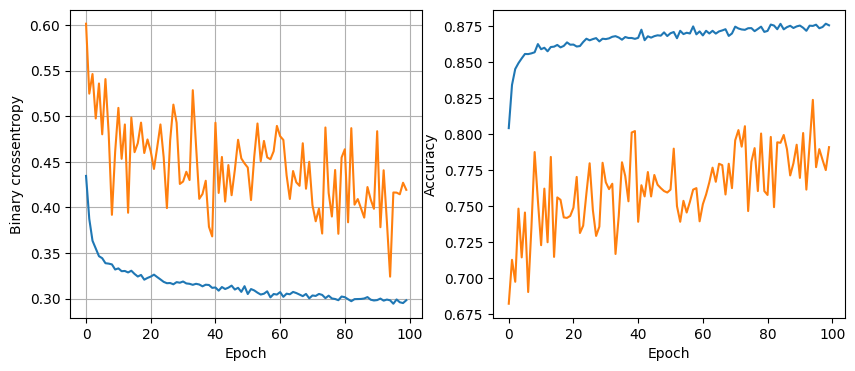

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8694 - loss: 0.3206
32 nodes, dropout 0.2, lr 0.1, batch_size 32


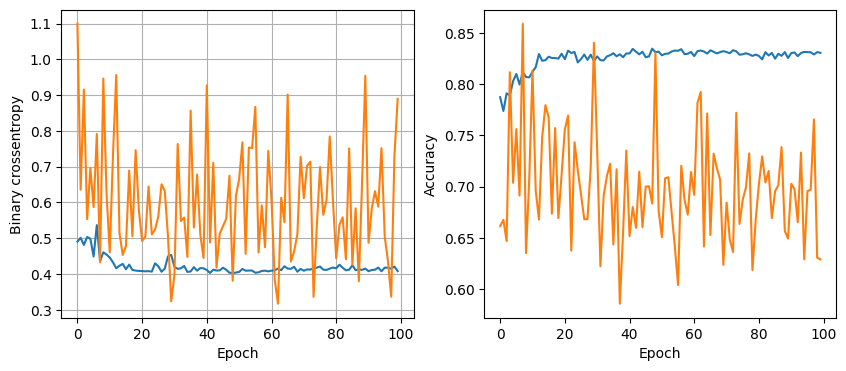

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8364 - loss: 0.4299
32 nodes, dropout 0.2, lr 0.1, batch_size 64


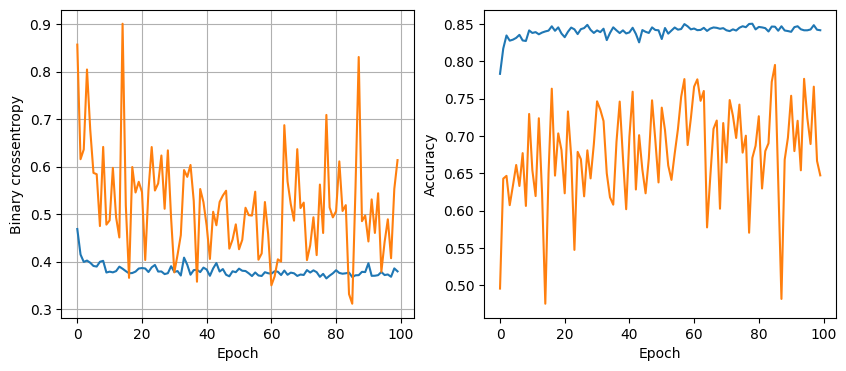

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8555 - loss: 0.3560
32 nodes, dropout 0.2, lr 0.1, batch_size 128


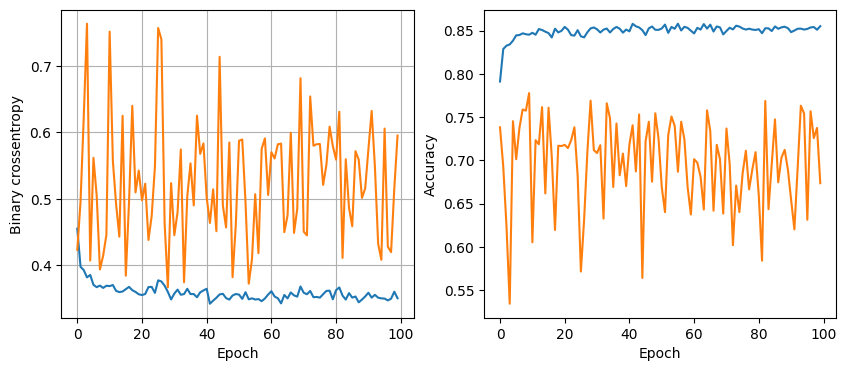

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8552 - loss: 0.3484
32 nodes, dropout 0.5, lr 0.001, batch_size 32


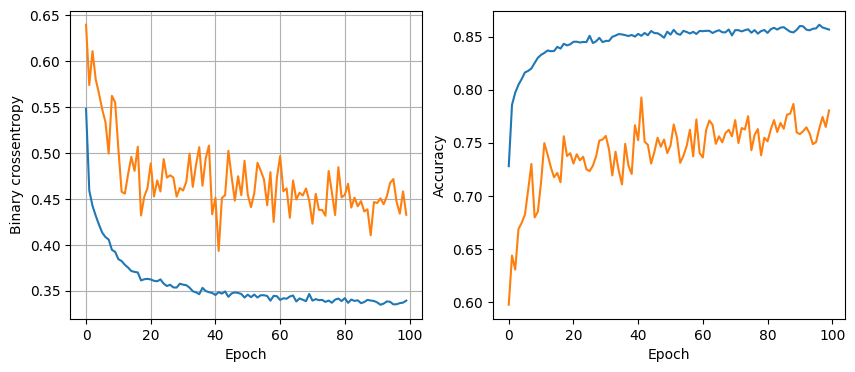

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8531 - loss: 0.3587
32 nodes, dropout 0.5, lr 0.001, batch_size 64


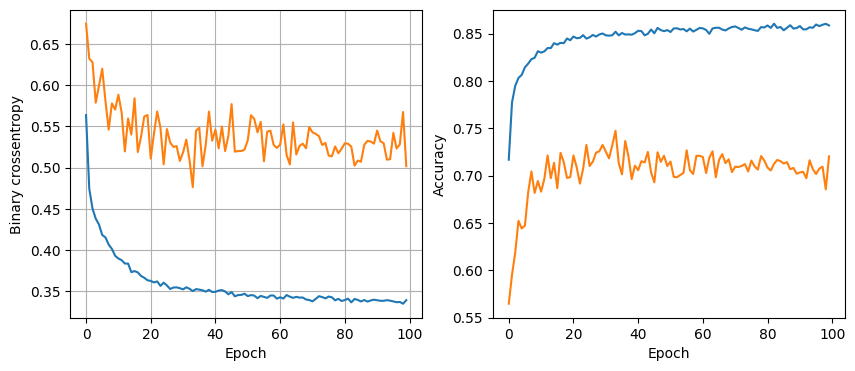

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8598 - loss: 0.3252
32 nodes, dropout 0.5, lr 0.001, batch_size 128


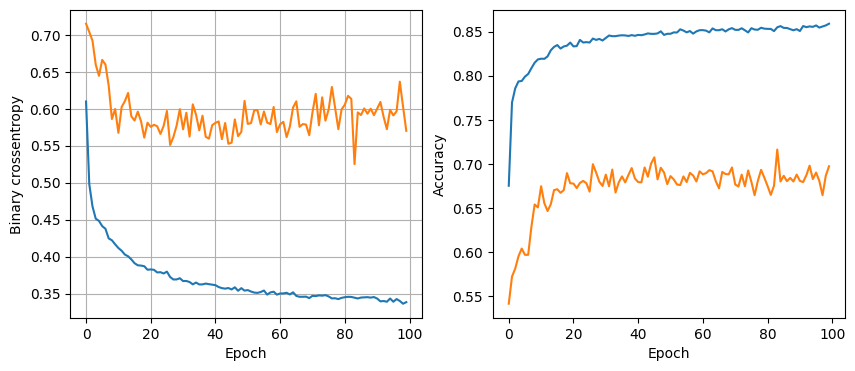

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8621 - loss: 0.3430
32 nodes, dropout 0.5, lr 0.01, batch_size 32


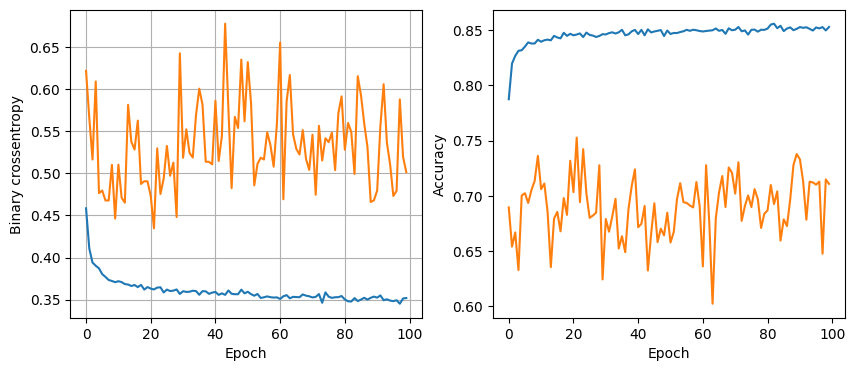

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8582 - loss: 0.3498
32 nodes, dropout 0.5, lr 0.01, batch_size 64


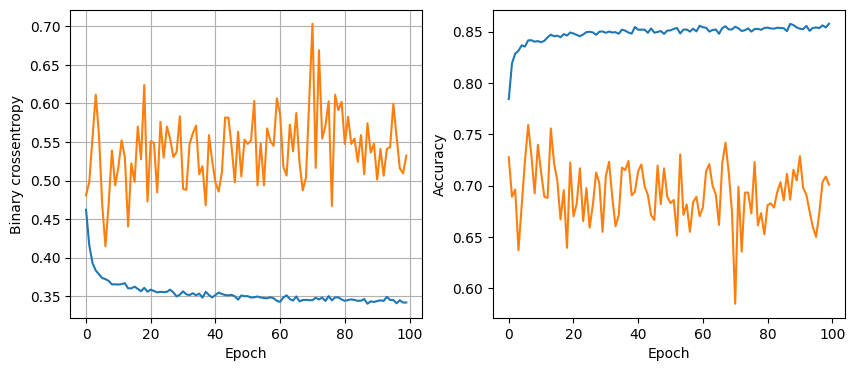

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8570 - loss: 0.3534
32 nodes, dropout 0.5, lr 0.01, batch_size 128


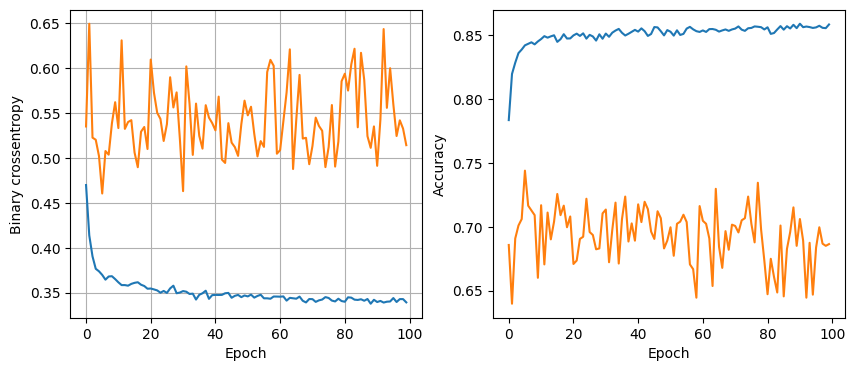

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8582 - loss: 0.3630
32 nodes, dropout 0.5, lr 0.1, batch_size 32


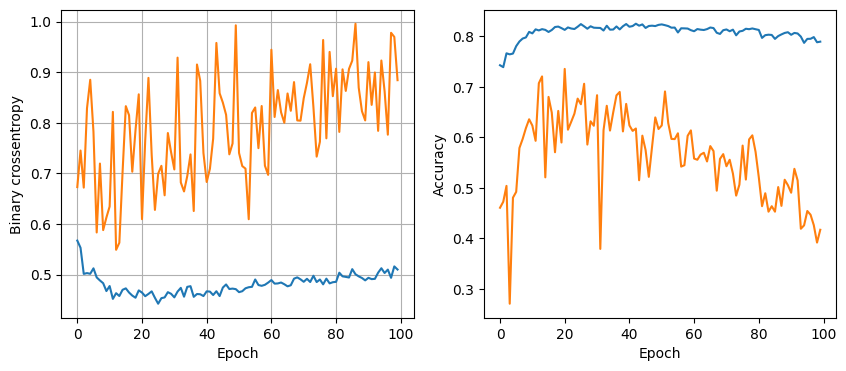

119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7774 - loss: 0.5143
32 nodes, dropout 0.5, lr 0.1, batch_size 64


KeyboardInterrupt: 

In [39]:
least_val_loss = float('inf')
least_loss_model = None
epochs = 100
for num_nodes in [16, 32, 64]:
    for dropout_prob in [0.2, 0.5]:
        for lr in [0.001, 0.01, 0.1]:
            for batch_size in [32, 64, 128]:
                print(f"{num_nodes} nodes, dropout {dropout_prob}, lr {lr}, batch_size {batch_size}")
                model, history = train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
                plot_history(history)
                val_loss = model.evaluate(X_valid, y_valid)[0]
                if val_loss < least_val_loss:
                    least_val_loss = val_loss
                    least_loss_model = model

In [ ]:
y_pred = least_loss_model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int).reshape(-1,)

print(classification_report(y_test, y_pred))

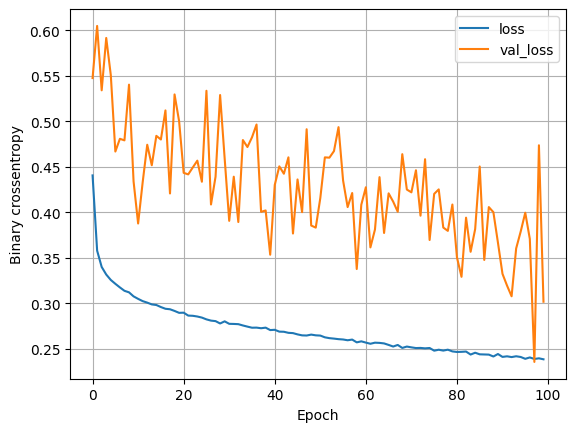

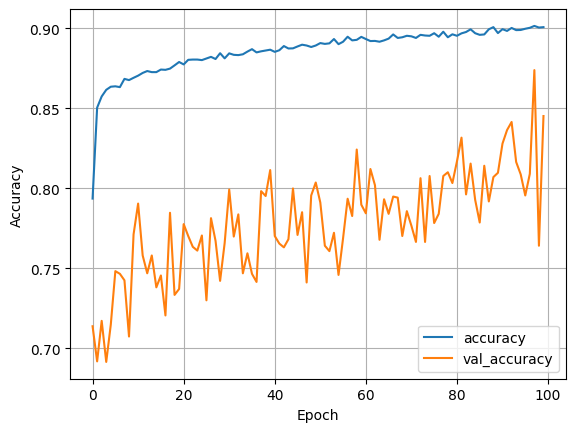

In [43]:
plot_loss(history)
plot_accuracy(history)

## Linear Regression Model

Data - Seoul Bike Sharing Demand Data Set UCI 

In [45]:
import copy
import seaborn as sns
import tensorflow as tf
from sklearn.linear_model import LinearRegression

In [27]:
# switch datasets columns 
dataset_cols = ['bike_count', 'hour', 'temp', 'humidity', 'wind', 'visibility', 'dew_pt_temp', 'radiation', 'rain', 'snow', 'functional']

df = pd.read_csv('seoul_bike_sharing_demand/SeoulBikeData.csv', encoding='ISO-8859-1').drop(['Date', 'Holiday', 'Seasons'], axis=1)


df.columns = dataset_cols
# switch functional data to integer
df['functional'] = df['functional'].map({'Yes': 1, 'No': 0}).astype(int)


# switch hour to 12am and drop it
df = df[df['hour'] == 12]
df.drop(['hour'], axis=1, inplace=True)

df.head(5)

,bike_count,temp,humidity,wind,visibility,dew_pt_temp,radiation,rain,snow,functional
12,449,1.7,23,1.4,2000,-17.2,1.11,0.0,0.0,1
36,479,4.3,41,1.3,1666,-7.8,1.09,0.0,0.0,1
60,333,5.8,85,1.7,349,3.4,0.43,0.0,0.0,1
84,393,-0.3,38,4.8,1823,-12.9,1.11,0.0,0.0,1
108,321,-2.3,25,0.0,1962,-19.7,0.00,0.0,0.0,1


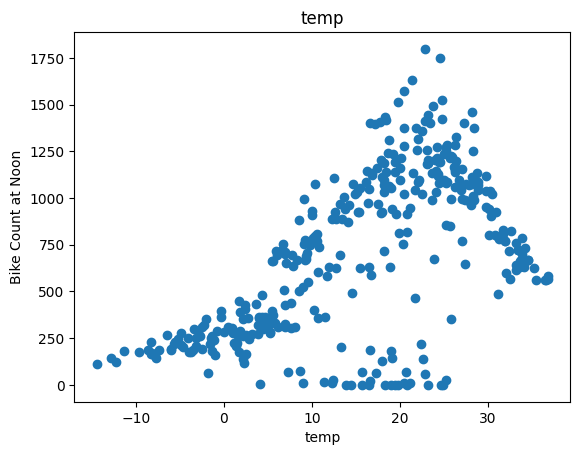

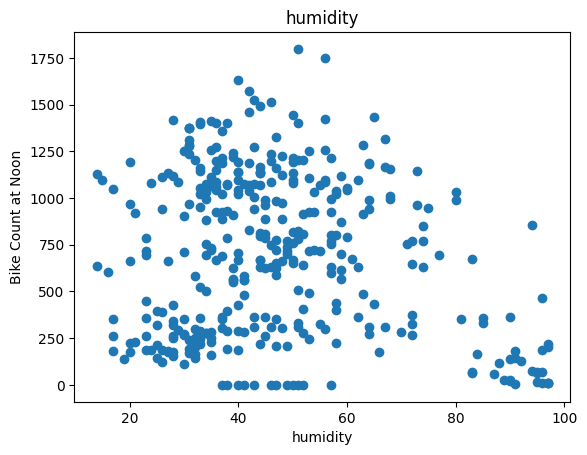

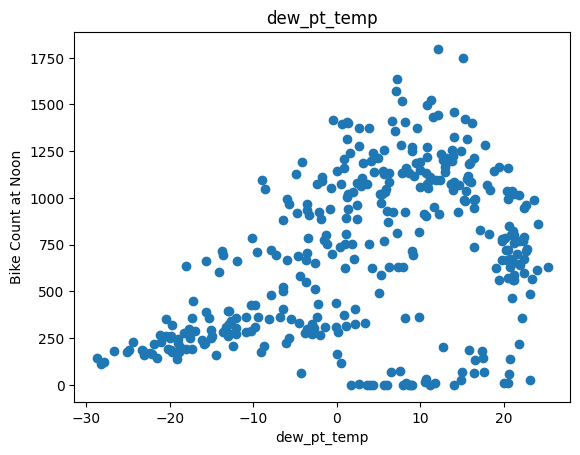

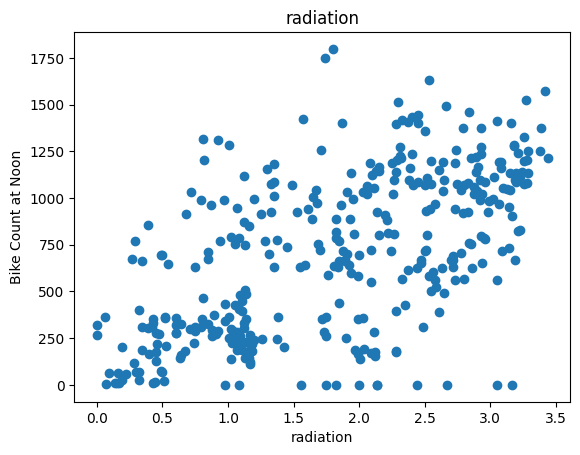

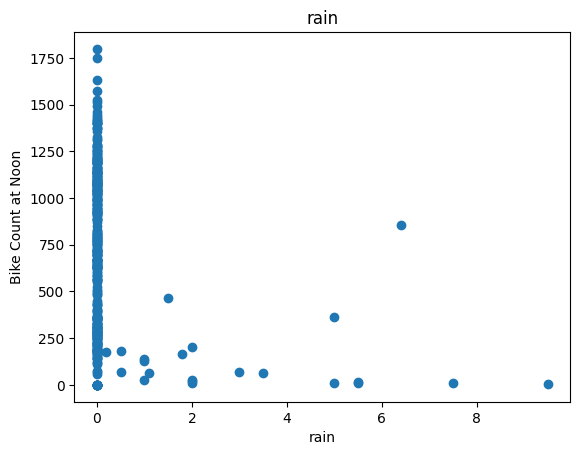

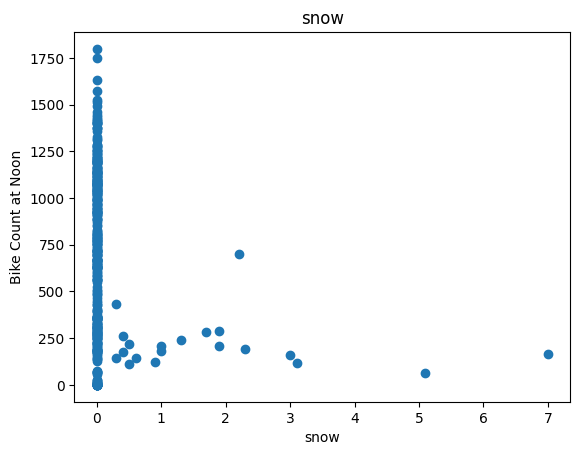

In [39]:
# plot everything
for label in df.columns[1:]:
    plt.scatter(df[label], df['bike_count'])
    plt.title(label)
    plt.ylabel("Bike Count at Noon")
    plt.xlabel(label)
    plt.show()


In [40]:
# from plots above drop wind, visibility and functional (non-linear)
print(df.columns)
# df = df.drop(['wind', 'visibility', 'functional'], axis=1)
# df.head()

Index(['bike_count', 'temp', 'humidity', 'dew_pt_temp', 'radiation', 'rain',
       'snow'],
      dtype='object')


### Train/Valid/Test Dataset

In [41]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])


c:\Users\wanjohi\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [46]:
def get_xy(dataframe, y_label, x_labels=None):
    dataframe = copy.deepcopy(dataframe)
    if x_labels is None:
        X = dataframe([c for c in dataframe.columns if c != y_label]).values
    else:
        if len(x_labels) == 1:
            X = dataframe[x_labels[0]].values.reshape(-1, 1)
        else:
            X = dataframe[x_labels].values

    y = dataframe[y_label].values.reshape(-1, 1)
    data = np.hstack((X, y))

    return data, X, y

In [49]:
_, X_train_temp, y_train_temp = get_xy(train, 'bike_count', x_labels=['temp'])
_, X_valid_temp, y_valid_temp = get_xy(valid, 'bike_count', x_labels=['temp'])
_, X_test_temp, y_test_temp = get_xy(test, 'bike_count', x_labels=['temp'])

In [50]:
temp_red = LinearRegression()
temp_red.fit(X_train_temp, y_train_temp)

LinearRegression()

In [51]:
print(temp_red.coef_, temp_red.intercept_)

[[19.86021141]] [385.10375212]


In [52]:
# score
temp_red.score(X_test_temp, y_test_temp)

0.3141520936439972

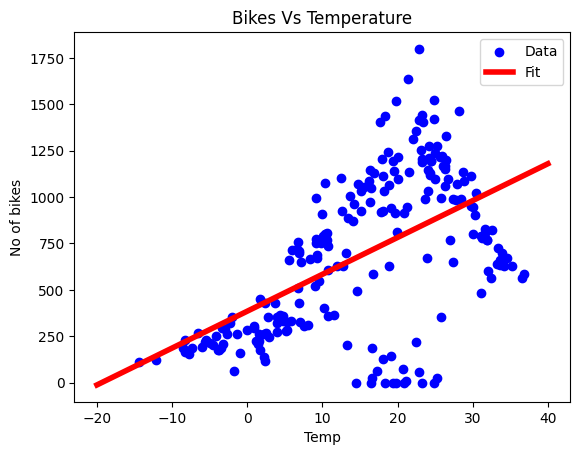

In [54]:
# plot
plt.scatter(X_train_temp, y_train_temp, label="Data", color='blue')
x = tf.linspace(-20, 40, 100)
plt.plot(x, temp_red.predict(np.asarray([x]).reshape(-1, 1)), label="Fit", color='red', linewidth=4)
plt.legend()
plt.title("Bikes Vs Temperature")
plt.ylabel("No of bikes")
plt.xlabel("Temp")
plt.show()

### Multiple Linear Regression

In [56]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

_, X_train_all, y_train_all = get_xy(train, 'bike_count', x_labels=df.columns[1:])
_, X_valid_all, y_valid_all = get_xy(valid, 'bike_count', x_labels=df.columns[1:])
_, X_test_all, y_test_all = get_xy(test, 'bike_count', x_labels=df.columns[1:])

c:\Users\wanjohi\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [57]:
all_red = LinearRegression()
all_red.fit(X_train_all, y_train_all)

LinearRegression()

In [58]:
all_red.score(X_test_all, y_test_all)

0.4331688217053774

## Regression with Neural Network

In [64]:
# import normalization from tensorflow
from tensorflow.keras.layers import Normalization

In [79]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('MSE')
  plt.legend()
  plt.grid(True)
  plt.show()

In [71]:
temp_normalizer = tf.keras.layers.Normalization(input_shape=(1,), axis=None)
temp_normalizer.adapt(X_train_temp.reshape(-1))

c:\Users\wanjohi\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [72]:
temp_nn_model = tf.keras.Sequential([
    temp_normalizer,
    tf.keras.layers.Dense(1)
])

In [73]:
temp_nn_model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.01), 
                      loss='mean_squared_error')

In [81]:
# use less epochs for smaller machines bruv

history = temp_nn_model.fit(X_train_temp.reshape(-1), y_train_temp, verbose=0, epochs=10, validation_data=(X_valid_temp, y_valid_temp))

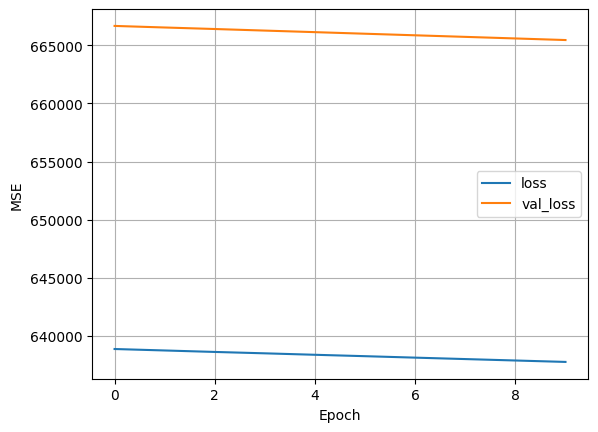

In [80]:
plot_loss(history)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


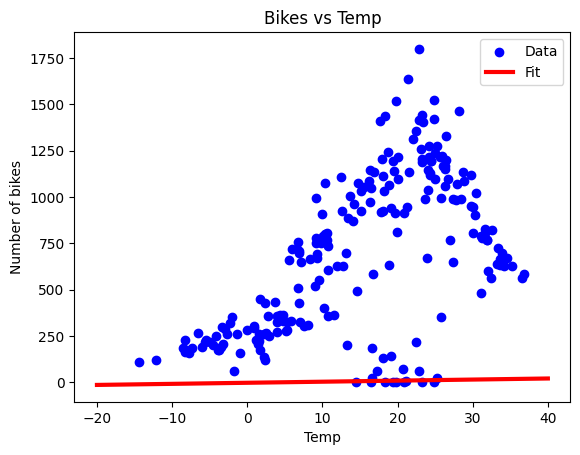

In [82]:
plt.scatter(X_train_temp, y_train_temp, label="Data", color="blue")
x = tf.linspace(-20, 40, 100)
plt.plot(x, temp_nn_model.predict(np.array(x).reshape(-1, 1)), label="Fit", color="red", linewidth=3)
plt.legend()
plt.title("Bikes vs Temp")
plt.ylabel("Number of bikes")
plt.xlabel("Temp")
plt.show()

### Neural Network

In [83]:
temp_normalizer = tf.keras.layers.Normalization(input_shape=(1,), axis=None)
temp_normalizer.adapt(X_train_temp.reshape(-1))

nn_model = tf.keras.Sequential([
    temp_normalizer,
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])
nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error')

c:\Users\wanjohi\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [87]:
history = nn_model.fit(
    X_train_temp, y_train_temp,
    validation_data=(X_valid_temp, y_valid_temp),
    verbose=0, epochs=10
)

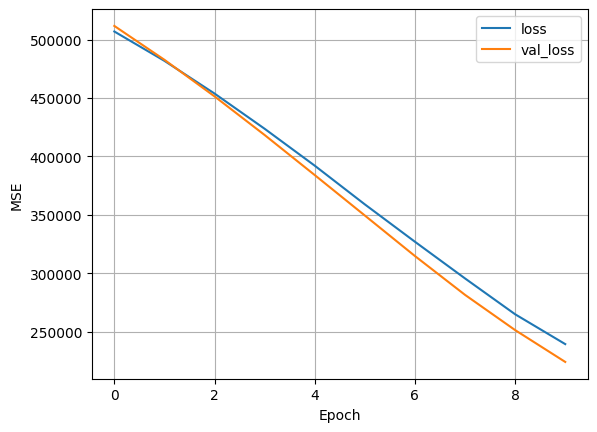

In [88]:
plot_loss(history)